<a href="https://colab.research.google.com/github/DIPANJAN001/Dipanjanpatra/blob/master/finalPV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install Boruta
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import concatenate
from keras import Model
from keras.layers import Input

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [161]:
df=pd.read_excel("/content/pv_10.xlsx")
weather_input1=df.drop('power_normed',axis=1)
weather_input=weather_input1.drop('time_idx',axis=1)
solpow=df['power_normed']

In [162]:
rfc = RandomForestRegressor(random_state=1, n_estimators=1000, max_depth=5)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=1)
boruta_selector.fit(np.array(weather_input), np.array(solpow)) 

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	17
Tentative: 	6
Rejected: 	26
Iteration: 	9 / 100
Confirmed: 	17
Tentative: 	6
Rejected: 	26
Iteration: 	10 / 100
Confirmed: 	17
Tentative: 	6
Rejected: 	26
Iteration: 	11 / 100
Confirmed: 	17
Tentative: 	6
Rejected: 	26
Iteration: 	12 / 100
Confirmed: 	17
Tentative: 	6
Rejected: 	26
Iteration: 	13 / 100
Confirmed: 	17
Tentative: 	6
Rejected: 	26
Iteration: 	14 / 100
Confirmed: 	17
Tentative: 	6
Rejected: 	26
Iteration: 	15 / 100
Confirmed: 	17
Tentative: 	6
Rejected: 	26
Iteration: 	16 / 100
Confirmed: 	17
Tentative: 	6
Reject

BorutaPy(estimator=RandomForestRegressor(max_depth=5, n_estimators=135,
                                         random_state=RandomState(MT19937) at 0x7F85B7D529E0),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F85B7D529E0, verbose=2)

In [163]:
def lstm_data_transform(x_data, y_data, num_steps):
    """ Changes data to the format for LSTM training 
for sliding window approach """
    # Prepare the list for the transformed data
    X, y = list(), list()
    # Loop of the entire data set
    for i in range(x_data.shape[0]):
        # compute a new (sliding window) index
        end_ix = i + num_steps
        # if index is larger than the size of the dataset, we stop
        if end_ix >= x_data.shape[0]:
            break
        # Get a sequence of data for x
        seq_X = x_data[i:end_ix]
        # Get only the last element of the sequency for y
        seq_y = y_data[end_ix]
        # Append the list with sequencies
        X.append(seq_X)
        y.append(seq_y)
    # Make final arrays
    x_array = np.array(X)
    y_array = np.array(y)
    return x_array, y_array

In [164]:
X_important_train = boruta_selector.transform(np.array(weather_input))
num_steps = 3
# training set
(x_transformed_train,
 y_transformed_train) = lstm_data_transform(X_important_train,solpow , num_steps=num_steps)
assert x_transformed_train.shape[0] == y_transformed_train.shape[0]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_transformed_train,y_transformed_train,test_size=0.4, random_state=42,shuffle=False)
#X_train_,X_val,y_train_,y_val=train_test_split(X_train,y_train,test_size=0.2, random_state=42,shuffle=False)

In [165]:
inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))

In [166]:
from keras.layers import Bidirectional
from keras import layers

In [167]:
def get_model1(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe1_0 = Bidirectional(LSTM(32, activation='relu',return_sequences = True))(inputs1)#32
    fe1_1 = Dropout(0.2)(fe1_0)
    fe1_2 = Bidirectional(LSTM(16, activation='relu',return_sequences = True))(fe1_1)#16
    fe1_3= Dropout(0.2)(fe1_2)
    fe1_4=Bidirectional(LSTM(8, activation='relu'))(fe1_3)#8
    out1_1=Dense(1, activation='linear')(fe1_4)
    return Model(inputs1, out1_1)
def get_model2(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe2_0 = Bidirectional(LSTM(16, activation='relu',return_sequences = True))(inputs1)#16,16,8
    fe2_1 = Dropout(0.5)(fe2_0)
    fe2_2 = Bidirectional(LSTM(16, activation='relu',return_sequences = True))(fe2_1)
    fe2_3= Dropout(0.5)(fe2_2)
    fe2_4=Bidirectional(LSTM(8, activation='relu'))(fe2_3)
    out2_1=Dense(1, activation='linear')(fe2_4)
    return Model(inputs1, out2_1)
def get_model3(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe3_0 = Bidirectional(LSTM(16, activation='relu',return_sequences = True))(inputs1)#16,8,8
    fe3_1 = Dropout(0.5)(fe3_0)
    fe3_2 = Bidirectional(LSTM(8, activation='relu',return_sequences = True))(fe3_1)
    fe3_3= Dropout(0.5)(fe3_2)
    fe3_4=Bidirectional(LSTM(8, activation='relu'))(fe3_3)
    out3_1=Dense(1, activation='linear')(fe3_4)
    return Model(inputs1, out3_1)
model1 = get_model1() 
model2 = get_model2() 
model3 = get_model3()
y1 = model1(inputs1) 
y2 = model2(inputs1) 
y3 = model3(inputs1)
outputs = layers.average([y1, y2, y3]) 
ensemble_model = Model(inputs=inputs1, outputs=outputs)
ensemble_model.compile(optimizer='Adam',loss='mean_squared_error',metrics=['RootMeanSquaredError'])
history=ensemble_model.fit(X_train, y_train, epochs = 200, batch_size = 64)

Epoch 1/200
58/58 [==============================] - 31s 34ms/step - loss: 0.0192 - root_mean_squared_error: 0.1385
Epoch 2/200
58/58 [==============================] - 2s 33ms/step - loss: 0.0068 - root_mean_squared_error: 0.0823
Epoch 3/200
58/58 [==============================] - 2s 30ms/step - loss: 0.0045 - root_mean_squared_error: 0.0671
Epoch 4/200
58/58 [==============================] - 2s 32ms/step - loss: 0.0037 - root_mean_squared_error: 0.0611
Epoch 5/200
58/58 [==============================] - 2s 31ms/step - loss: 0.0038 - root_mean_squared_error: 0.0616
Epoch 6/200
58/58 [==============================] - 2s 31ms/step - loss: 0.0034 - root_mean_squared_error: 0.0583
Epoch 7/200
58/58 [==============================] - 2s 29ms/step - loss: 0.0034 - root_mean_squared_error: 0.0585
Epoch 8/200
58/58 [==============================] - 2s 34ms/step - loss: 0.0034 - root_mean_squared_error: 0.0581
Epoch 9/200
58/58 [==============================] - 3s 47ms/step - loss: 0.003

77/77 [==============================] - 4s 6ms/step


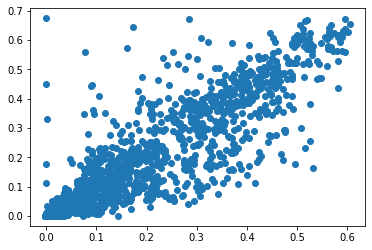

In [168]:
y_en_=ensemble_model.predict(X_test)
plt.scatter(y_en_,y_test)
plt.show()

In [169]:
df_ = pd.DataFrame()
df_['time']=[i for i in range(len(y_en_))]
df_['Actual']=y_test
df_['Predicted']=y_en_

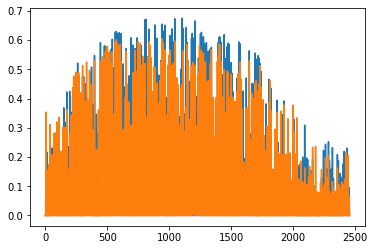

In [170]:
import matplotlib.pyplot as plt
plt.plot(df_['time'],df_['Actual'])
plt.plot(df_['time'],df_['Predicted'])
plt.show()

In [171]:
def get_model1(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe1_0 = Bidirectional(LSTM(32, activation='relu',return_sequences = True))(inputs1)#32
    fe1_1 = Dropout(0.2)(fe1_0)
    fe1_2 = Bidirectional(LSTM(16, activation='relu',return_sequences = True))(fe1_1)#16
    fe1_3= Dropout(0.2)(fe1_2)
    fe1_4=Bidirectional(LSTM(8, activation='relu'))(fe1_3)#8
    out1_1=Dense(1, activation='linear')(fe1_4)
    return Model(inputs1, out1_1)
def get_model2(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe2_0 = Bidirectional(LSTM(16, activation='relu',return_sequences = True))(inputs1)#16,16,8
    fe2_1 = Dropout(0.5)(fe2_0)
    fe2_2 = Bidirectional(LSTM(16, activation='relu',return_sequences = True))(fe2_1)
    fe2_3= Dropout(0.5)(fe2_2)
    fe2_4=Bidirectional(LSTM(8, activation='relu'))(fe2_3)
    out2_1=Dense(1, activation='linear')(fe2_4)
    return Model(inputs1, out2_1)
def get_model3(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe3_0 = Bidirectional(LSTM(16, activation='relu',return_sequences = True))(inputs1)#16,8,8
    fe3_1 = Dropout(0.5)(fe3_0)
    fe3_2 = Bidirectional(LSTM(8, activation='relu',return_sequences = True))(fe3_1)
    fe3_3= Dropout(0.5)(fe3_2)
    fe3_4=Bidirectional(LSTM(8, activation='relu'))(fe3_3)
    out3_1=Dense(1, activation='linear')(fe3_4)
    return Model(inputs1, out3_1)
model1 = get_model1() 
#model2 = get_model2() 
model3 = get_model3()
y1 = model1(inputs1) 
#y2 = model2(inputs1) 
y3 = model3(inputs1)
outputs = layers.average([y1,y3]) 
ensemble_model = Model(inputs=inputs1, outputs=outputs)
ensemble_model.compile(optimizer='Adam',loss='mean_squared_error',metrics=['RootMeanSquaredError'])
history=ensemble_model.fit(X_train, y_train, epochs = 200, batch_size = 64)

Epoch 1/200
58/58 [==============================] - 19s 21ms/step - loss: 0.0199 - root_mean_squared_error: 0.1411
Epoch 2/200
58/58 [==============================] - 1s 19ms/step - loss: 0.0078 - root_mean_squared_error: 0.0884
Epoch 3/200
58/58 [==============================] - 1s 21ms/step - loss: 0.0047 - root_mean_squared_error: 0.0682
Epoch 4/200
58/58 [==============================] - 1s 21ms/step - loss: 0.0041 - root_mean_squared_error: 0.0640
Epoch 5/200
58/58 [==============================] - 1s 22ms/step - loss: 0.0038 - root_mean_squared_error: 0.0617
Epoch 6/200
58/58 [==============================] - 1s 20ms/step - loss: 0.0036 - root_mean_squared_error: 0.0597
Epoch 7/200
58/58 [==============================] - 1s 22ms/step - loss: 0.0034 - root_mean_squared_error: 0.0585
Epoch 8/200
58/58 [==============================] - 1s 21ms/step - loss: 0.0033 - root_mean_squared_error: 0.0576
Epoch 9/200
58/58 [==============================] - 1s 19ms/step - loss: 0.003

77/77 [==============================] - 2s 5ms/step


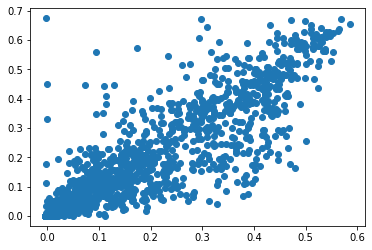

In [172]:
y_en=ensemble_model.predict(X_test)
plt.scatter(y_en,y_test)
plt.show()

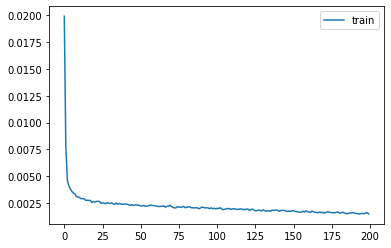

In [173]:
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()

In [174]:
df_ = pd.DataFrame()

In [175]:
df_['time']=[i for i in range(len(y_en))]
df_['Actual']=y_test
df_['Predicted']=y_en
df_['Predicted1']=y_en_

In [176]:
df__= pd.DataFrame()

In [177]:
df__['time']=[i for i in range(len(solpow))]
df__['power']=solpow

In [178]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [179]:

fig = make_subplots(rows=1, cols=1)
fig.add_trace(
    go.Scatter(x=df_.reset_index()['time'], y=df_.reset_index()['Actual'],name='Actual generated solar power'),row=1,col=1
)
fig.add_trace(
    go.Scatter(x=df_.reset_index()['time'], y=df_.reset_index()['Predicted'],name='Predicted generated solar power LSTM '),row=1,col=1
)
fig.update_xaxes(title_text="Time")
fig.update_yaxes(title_text="SolarPower")

fig.show()

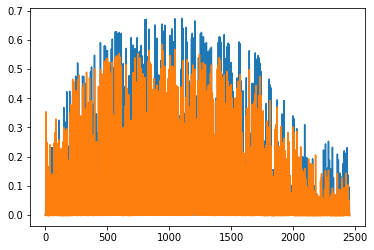

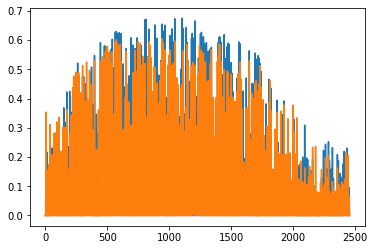

In [180]:
import matplotlib.pyplot as plt
plt.plot(df_['time'],df_['Actual'])
plt.plot(df_['time'],df_['Predicted'])
plt.show()
plt.plot(df_['time'],df_['Actual'])
plt.plot(df_['time'],df_['Predicted1'])

plt.show()

In [181]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers import LeakyReLU
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.models import load_model
from keras.layers import Input

In [182]:
n_inputs=weather_input.shape[1]

In [183]:
input_data_shape= Input(shape=(n_inputs,))
# encoder level 1
encoder= Dense(n_inputs*2)(input_data_shape)
encoder = BatchNormalization()(encoder)
encoder= LeakyReLU()(encoder)
# encoder level 2
encoder= Dense(n_inputs)(encoder)
encoder= BatchNormalization()(encoder)
encoder= LeakyReLU()(encoder)
# bottleneck
#n_bottleneck = round(float(n_inputs) / 2.0)
n_bottleneck = 20
bottleneck = Dense(n_bottleneck)(encoder)
# define decoder, level 1
decoder = Dense(n_inputs)(bottleneck)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)
# decoder level 2
decoder = Dense(n_inputs*2)(decoder)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)

In [184]:
output = Dense(n_inputs, activation='linear')(decoder)
# define autoencoder model
model = Model(inputs=input_data_shape, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

In [185]:
 model.fit(weather_input,weather_input, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
192/192 - 2s - loss: 0.1007 - 2s/epoch - 9ms/step
Epoch 2/100
192/192 - 1s - loss: 0.0186 - 623ms/epoch - 3ms/step
Epoch 3/100
192/192 - 1s - loss: 0.0148 - 574ms/epoch - 3ms/step
Epoch 4/100
192/192 - 1s - loss: 0.0128 - 505ms/epoch - 3ms/step
Epoch 5/100
192/192 - 1s - loss: 0.0121 - 569ms/epoch - 3ms/step
Epoch 6/100
192/192 - 1s - loss: 0.0112 - 531ms/epoch - 3ms/step
Epoch 7/100
192/192 - 1s - loss: 0.0103 - 534ms/epoch - 3ms/step
Epoch 8/100
192/192 - 1s - loss: 0.0098 - 528ms/epoch - 3ms/step
Epoch 9/100
192/192 - 1s - loss: 0.0095 - 540ms/epoch - 3ms/step
Epoch 10/100
192/192 - 1s - loss: 0.0092 - 568ms/epoch - 3ms/step
Epoch 11/100
192/192 - 1s - loss: 0.0090 - 509ms/epoch - 3ms/step
Epoch 12/100
192/192 - 0s - loss: 0.0084 - 486ms/epoch - 3ms/step
Epoch 13/100
192/192 - 1s - loss: 0.0081 - 504ms/epoch - 3ms/step
Epoch 14/100
192/192 - 1s - loss: 0.0082 - 559ms/epoch - 3ms/step
Epoch 15/100
192/192 - 1s - loss: 0.0073 - 545ms/epoch - 3ms/step
Epoch 16/100
192/192 -

In [186]:
# define an encoder model (without the decoder)
encoder = Model(inputs=input_data_shape, outputs=bottleneck)
# save the encoder to file
encoder.save('encoder.h5')

In [187]:
solpow=solpow.to_numpy().reshape(-1,1)
encoder = load_model('encoder.h5')

# encode the train data
X_train_encode = encoder.predict(weather_input)

192/192 [==============================] - 0s 1ms/step


In [188]:
encoder = load_model('encoder.h5')

# encode the train data
X_train_encode = encoder.predict(weather_input)

192/192 [==============================] - 0s 2ms/step


In [189]:
num_steps = 3
# training set
(x_transformed1,
 y_transformed1) = lstm_data_transform(X_train_encode,solpow , num_steps=num_steps)
assert x_transformed1.shape[0] == y_transformed1.shape[0]

In [190]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x_transformed1, y_transformed1, test_size=0.4, random_state=42,shuffle=False)

In [191]:
inputs1=Input(shape=(X_train1.shape[1],X_train1.shape[2]))

In [192]:
def get_model1(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe1_0 = Bidirectional(LSTM(32, activation='relu',return_sequences = True))(inputs1)#32
    fe1_1 = Dropout(0.2)(fe1_0)
    fe1_2 = Bidirectional(LSTM(16, activation='relu',return_sequences = True))(fe1_1)#16
    fe1_3= Dropout(0.2)(fe1_2)
    fe1_4=Bidirectional(LSTM(8, activation='relu'))(fe1_3)#8
    out1_1=Dense(1, activation='linear')(fe1_4)
    return Model(inputs1, out1_1)
def get_model2(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe2_0 = Bidirectional(LSTM(16, activation='relu',return_sequences = True))(inputs1)#16,16,8
    fe2_1 = Dropout(0.5)(fe2_0)
    fe2_2 = Bidirectional(LSTM(16, activation='relu',return_sequences = True))(fe2_1)
    fe2_3= Dropout(0.5)(fe2_2)
    fe2_4=Bidirectional(LSTM(8, activation='relu'))(fe2_3)
    out2_1=Dense(1, activation='linear')(fe2_4)
    return Model(inputs1, out2_1)
def get_model3(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe3_0 = Bidirectional(LSTM(16, activation='relu',return_sequences = True))(inputs1)#16,8,8
    fe3_1 = Dropout(0.5)(fe3_0)
    fe3_2 = Bidirectional(LSTM(8, activation='relu',return_sequences = True))(fe3_1)
    fe3_3= Dropout(0.5)(fe3_2)
    fe3_4=Bidirectional(LSTM(8, activation='relu'))(fe3_3)
    out3_1=Dense(1, activation='linear')(fe3_4)
    return Model(inputs1, out3_1)
model1 = get_model1() 
model2 = get_model2() 
model3 = get_model3()
y1 = model1(inputs1) 
y2 = model2(inputs1) 
y3 = model3(inputs1)
outputs = layers.average([y1, y2, y3]) 
ensemble_model = Model(inputs=inputs1, outputs=outputs)
ensemble_model.compile(optimizer='Adam',loss='mean_squared_error',metrics=['RootMeanSquaredError'])
history=ensemble_model.fit(X_train1, y_train1, epochs = 200, batch_size = 64)

Epoch 1/200
58/58 [==============================] - 32s 33ms/step - loss: 0.0185 - root_mean_squared_error: 0.1361
Epoch 2/200
58/58 [==============================] - 2s 32ms/step - loss: 0.0051 - root_mean_squared_error: 0.0712
Epoch 3/200
58/58 [==============================] - 2s 32ms/step - loss: 0.0037 - root_mean_squared_error: 0.0612
Epoch 4/200
58/58 [==============================] - 2s 28ms/step - loss: 0.0034 - root_mean_squared_error: 0.0582
Epoch 5/200
58/58 [==============================] - 2s 30ms/step - loss: 0.0032 - root_mean_squared_error: 0.0563
Epoch 6/200
58/58 [==============================] - 2s 28ms/step - loss: 0.0028 - root_mean_squared_error: 0.0531
Epoch 7/200
58/58 [==============================] - 2s 28ms/step - loss: 0.0028 - root_mean_squared_error: 0.0525
Epoch 8/200
58/58 [==============================] - 2s 28ms/step - loss: 0.0027 - root_mean_squared_error: 0.0517
Epoch 9/200
58/58 [==============================] - 2s 28ms/step - loss: 0.002

77/77 [==============================] - 4s 7ms/step


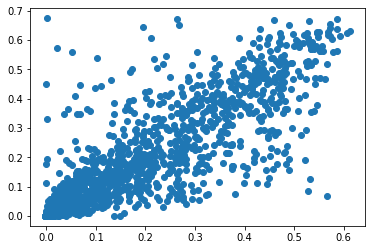

In [193]:
y_en=ensemble_model.predict(X_test1)
plt.scatter(y_en,y_test1)
plt.show()

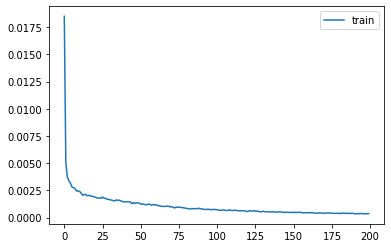

In [194]:
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()

In [195]:
df_ = pd.DataFrame()
df_['time']=[i for i in range(len(y_en))]
df_['Actual']=y_test
df_['Predicted']=y_en

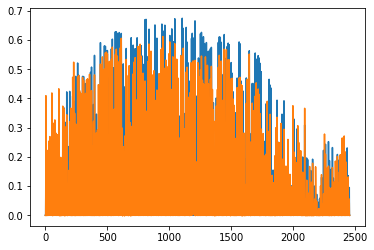

In [196]:
import matplotlib.pyplot as plt
plt.plot(df_['time'],df_['Actual'])
plt.plot(df_['time'],df_['Predicted'])
plt.show()

In [197]:
from sklearn.decomposition import PCA 

In [198]:
pca = PCA(n_components = 20)
pca.fit(weather_input)
data_pca = pca.transform(weather_input)
data_pca = pd.DataFrame(data_pca)

In [199]:
data_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.374362,-0.743236,-0.291453,-0.639866,0.054792,-0.057342,-0.355902,0.280158,-0.149976,0.247793,0.258016,-0.179347,0.066086,-0.029212,-0.013355,0.114407,0.004041,-0.010832,-0.016391,-0.032943
1,-1.282654,-0.865612,-0.444850,-0.491431,0.192255,0.061655,-0.255726,0.098682,0.024778,-0.000531,0.200461,-0.233742,0.118103,0.027204,-0.100309,0.105934,-0.027624,0.035695,0.024442,-0.004284
2,-1.061485,-0.910794,-0.409216,-0.136308,0.766949,0.063469,-0.069533,0.153283,0.431572,-0.220944,-0.087714,-0.226822,-0.181816,0.172717,-0.168880,0.112905,-0.082923,0.044805,0.057551,0.054913
3,-0.208895,-1.207255,-0.407303,-0.154228,0.460401,-0.080142,0.589147,0.081301,0.595748,-0.317721,0.281208,-0.060565,-0.215660,0.035832,0.013190,0.174570,-0.085039,0.019518,-0.001320,0.003298
4,0.402259,-1.433338,-0.407126,0.095819,0.351055,-0.019594,0.450300,0.397043,0.488785,-0.179078,0.150566,-0.157206,-0.187462,0.112549,-0.100618,0.077478,-0.090767,0.082080,0.021889,0.050145


In [200]:
num_steps = 3
# training set
(x_transformed1,
 y_transformed1) = lstm_data_transform(data_pca,solpow , num_steps=num_steps)
assert x_transformed1.shape[0] == y_transformed1.shape[0]

In [201]:
X_train2, X_test2, y_train2, y_test2= train_test_split(x_transformed1, y_transformed1, test_size=0.4, random_state=42,shuffle=False)

In [202]:
def get_model1(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe1_0 = Bidirectional(LSTM(32, activation='relu',return_sequences = True))(inputs1)#32
    fe1_1 = Dropout(0.2)(fe1_0)
    fe1_2 = Bidirectional(LSTM(16, activation='relu',return_sequences = True))(fe1_1)#16
    fe1_3= Dropout(0.2)(fe1_2)
    fe1_4=Bidirectional(LSTM(8, activation='relu'))(fe1_3)#8
    out1_1=Dense(1, activation='linear')(fe1_4)
    return Model(inputs1, out1_1)
def get_model2(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe2_0 = Bidirectional(LSTM(16, activation='relu',return_sequences = True))(inputs1)#16,16,8
    fe2_1 = Dropout(0.5)(fe2_0)
    fe2_2 = Bidirectional(LSTM(16, activation='relu',return_sequences = True))(fe2_1)
    fe2_3= Dropout(0.5)(fe2_2)
    fe2_4=Bidirectional(LSTM(8, activation='relu'))(fe2_3)
    out2_1=Dense(1, activation='linear')(fe2_4)
    return Model(inputs1, out2_1)
def get_model3(): 
    #inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))
    fe3_0 = Bidirectional(LSTM(16, activation='relu',return_sequences = True))(inputs1)#16,8,8
    fe3_1 = Dropout(0.5)(fe3_0)
    fe3_2 = Bidirectional(LSTM(8, activation='relu',return_sequences = True))(fe3_1)
    fe3_3= Dropout(0.5)(fe3_2)
    fe3_4=Bidirectional(LSTM(8, activation='relu'))(fe3_3)
    out3_1=Dense(1, activation='linear')(fe3_4)
    return Model(inputs1, out3_1)
model1 = get_model1() 
model2 = get_model2() 
model3 = get_model3()
y1 = model1(inputs1) 
y2 = model2(inputs1) 
y3 = model3(inputs1)
outputs = layers.average([y1, y2, y3]) 
ensemble_model = Model(inputs=inputs1, outputs=outputs)
ensemble_model.compile(optimizer='Adam',loss='mean_squared_error',metrics=['RootMeanSquaredError'])
history=ensemble_model.fit(X_train2, y_train2, epochs = 200, batch_size = 64)

Epoch 1/200
58/58 [==============================] - 27s 29ms/step - loss: 0.0181 - root_mean_squared_error: 0.1346
Epoch 2/200
58/58 [==============================] - 2s 30ms/step - loss: 0.0047 - root_mean_squared_error: 0.0689
Epoch 3/200
58/58 [==============================] - 2s 30ms/step - loss: 0.0034 - root_mean_squared_error: 0.0585
Epoch 4/200
58/58 [==============================] - 2s 33ms/step - loss: 0.0033 - root_mean_squared_error: 0.0574
Epoch 5/200
58/58 [==============================] - 2s 33ms/step - loss: 0.0031 - root_mean_squared_error: 0.0554
Epoch 6/200
58/58 [==============================] - 2s 31ms/step - loss: 0.0029 - root_mean_squared_error: 0.0539
Epoch 7/200
58/58 [==============================] - 2s 30ms/step - loss: 0.0028 - root_mean_squared_error: 0.0532
Epoch 8/200
58/58 [==============================] - 2s 33ms/step - loss: 0.0025 - root_mean_squared_error: 0.0497
Epoch 9/200
58/58 [==============================] - 2s 34ms/step - loss: 0.002

77/77 [==============================] - 4s 6ms/step


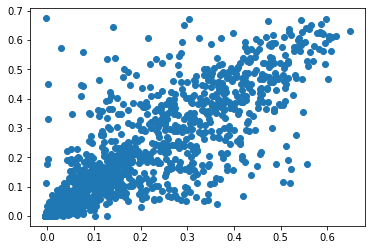

In [203]:
y_en=ensemble_model.predict(X_test2)
plt.scatter(y_en,y_test2)
plt.show()

In [204]:
df_ = pd.DataFrame()
df_['time']=[i for i in range(len(y_en))]
df_['Actual']=y_test2
df_['Predicted']=y_en

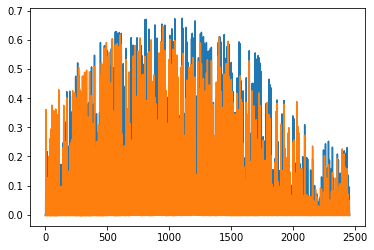

In [205]:
import matplotlib.pyplot as plt
plt.plot(df_['time'],df_['Actual'])
plt.plot(df_['time'],df_['Predicted'])
plt.show()